In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
import seaborn as sns
import rdata
import json
import ast

In [2]:
with open('neuron_catalog_1.json', 'r') as f:
    neuron_catalog_1 = json.load(f) 

with open('neuron_catalog_2.json', 'r') as f:
    neuron_catalog_2 = json.load(f) 

with open('neuron_catalog_3.json', 'r') as f:
    neuron_catalog_3 = json.load(f) 

## 2. Rastor Plot

In [3]:
import os
path = os.getcwd().removesuffix('/evaluate')
os.chdir(path)
from algorithm.model import *
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import pytorch_lightning as pl
from algorithm import *
from helpers import *
from algorithm.metrics import get_corr


acc_chance = 0.05

import matplotlib
import matplotlib.colors as clr
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.dpi"]=200


/opt/anaconda3/envs/ccSNN/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def get_voltages(settings,student, pre_path=''):

    dt=settings.time_step
    student.call_outside_loop=True

    trainloader, valloader, testloader, nb_steps = choose_data_params(
        data_set_name, settings, num_workers=0,pre_path=pre_path
    ) 
    data_module = DataModule(trainloader, valloader, testloader)
    data_module.setup(stage="test")  # make sure test data is prepared
    test_loader = data_module.train_dataloader()
    test_batch = next(iter(test_loader))
    inputs, target = test_batch

    mems= (-student.model.time_step/torch.log(student.model.beta)).cpu().detach().numpy() #tau_mem

    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu')
    inputs = inputs.to(device)
    target = target.to(device)
    
    student.model.eval()

    output, [mem_rec,spk_rec]=student.model.forward(inputs,target)

    return mem_rec, spk_rec, inputs, output, target

In [5]:
#oi
data_set_name='olfactory'
i=0
j=0
teacher_params='wi'
train_params='oi'
train_loss='nll'
train_layer='hil'
pre_path = 'data/ORN_data/samples'

hil=0.0
teacher_low_rank_sparse=None
teacher_weight_init='normal'
teacher_neuron_model='LIF'#'BLK_nonsp' 'LIF'
teacher_sparsity=0.5
neuron_model='LIF'#'BLK_nonsp'
synapse_name='recurrent_synapse'
seed=None
config_path = 'fruitfly'

settings = Config(data_set_name,settings_file=config_path)
settings.weight_scaling_factor=20
settings.target_weights=None
weight_info=settings.train_weights,settings.Dales_law,settings.weight_init_,settings.target_weights,settings.weight_scaling_factor,settings.recurrent_sparse,settings.low_rank_sparse
neuron_synapse=f'{settings.neuron_name}_{settings.synapse.__name__}'

size_string=get_size_str(settings.batch_size,settings.nb_inputs,settings.nb_outputs)
data_module =choose_data_params(
        data_set_name, settings, num_workers=4,pre_path=pre_path
    ) 

teacher = None 
# new instance of model
model = Lightning_SNN(
        net_size=settings.net_size,
        neuron_fct=settings.neuron_fct,
        neuron_intrinsic=settings.neuron_intrinsic,
        synapse_intrinsic=settings.synapse_intrinsic,
        train_intrinsic=settings.train_intrinsic,
        clip_intrinsic=settings.clip_intrinsic,
        regularizers=settings.regularizers,
        train_out=settings.train_out,
        train_hidden=settings.train_hidden,
        weight_info=settings.weight_info,
        nr=i,
        learning_rate=settings.learning_rate,
        time_step=settings.time_step,
        optim_class=settings.optim_class,
        optim_params=settings.optim_params,
        scheduler=settings.scheduler,
        surr_grad_scale=settings.surr_grad_scale,
        adapt_intrinsic=False,#TODO
        tau_mem_LIF=settings.tau_mem,
        training_mode = settings.training_mode,
        hidden_mode=settings.hidden_mode,
        target_model = settings.target_model,
        params_from_target = settings.params_from_target,
        hidden_in_loss = settings.hidden_in_loss,
        hidden_loss_scale=settings.hidden_loss_scale,
        noise=settings.noise,
        path_info=None,
        N_train_only_weights = settings.N_train_only_weights,
        shuffle=False
    )

self.synapse intr noise is 0.0
nb hidden inside config: 9628
self.synapse_noise: 0.0
dims is False
dims is 1
shape in config tau_mem: torch.Size([9628])
shape in config beta: torch.Size([9628])
config wsf: 1.0
settings.batch_size: 16
lightning init device cpu
N rec = 0
N unrec = 9628
hidden in loss in SNN are None
first instance of tau_mem in SNN: torch.Size([9628])
LIF model with, U_rest 0.0, rest 0.0, tau mem tensor([0.0560, 0.0487, 0.0567,  ..., 0.0201, 0.0498, 0.0659],
       dtype=torch.float64), thresh 1.0, I_c tensor([ 0.8621, -0.6387,  0.2766,  ...,  0.1916,  0.9431,  0.0691],
       dtype=torch.float64)
tau_mem shape before tensor: torch.Size([9628])
tau_mem in SNN after tensor: torch.Size([9628])
beta in SNN: torch.Size([9628])
model is SNN, is_spiking True
train_intrinsic: ['I_c', 'beta']
2


train weights: False, train_intrinsic: ['I_c', 'beta']


self is student: False
init w2
scale: 1.0, std is 0.0562543950463012
model is student: False
init w1
init v


/Users/jeffreyhu/Desktop/summerschool2025-ccSNN/projects/algorithm/config/Config.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.beta = torch.exp(-self.time_step / torch.tensor(self.tau_mem))
/Users/jeffreyhu/Desktop/summerschool2025-ccSNN/projects/algorithm/model/fruitfly_olf.py:338: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  w1_df["nt_type"] = w1_df["nt_type"].replace(self.replace_nt)
/Users/jeffreyhu/Desktop/summerschool2025-ccSNN/projects/algorithm/model/fruitfly_olf.py:339: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

fruit fly weights set up
Parameter name: I_c, requires_grad: True
Parameter name: beta, requires_grad: True
Parameter name: reset, requires_grad: False
Parameter name: nt_values, requires_grad: False
Parameter name: weight_scaling_factor, requires_grad: True
Parameter name: w2, requires_grad: True


using classification loss


train out: True, train hidden: False, self hidden mode is None


In [6]:
mem_rec, spk_rec, input, output, target=get_voltages(settings,model, pre_path=pre_path)

settings.batch_size: 16
initializing data module
torch.Size([16, 501, 1, 2264])
torch.Size([16, 501, 2264])
16
inputs shape: torch.Size([16, 501, 2264]), self.w1 shape: torch.Size([2264, 9628])
nb_steps in forward is 501


In [7]:
input.shape
input=np.random.randint(0,2,(input.shape))

In [41]:
neuron_catalog_1

{'receptors': ['720575940628660224',
  '720575940619051009',
  '720575940628553731',
  '720575940629020675',
  '720575940624384007',
  '720575940606869513',
  '720575940609228809',
  '720575940607221771',
  '720575940623302669',
  '720575940625825820',
  '720575940614037533',
  '720575940631494687',
  '720575940617166882',
  '720575940644028452',
  '720575940616921129',
  '720575940617986089',
  '720575940631429165',
  '720575940631314479',
  '720575940614996018',
  '720575940616093746',
  '720575940645576756',
  '720575940633059381',
  '720575940638818357',
  '720575940627890231',
  '720575940628619319',
  '720575940630282297',
  '720575940632633400',
  '720575940646142004',
  '720575940633509949',
  '720575940638212166',
  '720575940638867526',
  '720575940627677258',
  '720575940639080526',
  '720575940617109597',
  '720575940617232477',
  '720575940633313376',
  '720575940620574817',
  '720575940609884258',
  '720575940630257772',
  '720575940619419757',
  '720575940630462572',
  '

In [30]:
print(len(model.model.input_neuron_IDs))
model.model.input_neuron_IDs

2264


[720575940605686886,
 720575940606165606,
 720575940606167142,
 720575940606227890,
 720575940606922674,
 720575940606949042,
 720575940607090306,
 720575940608044501,
 720575940608283147,
 720575940609040835,
 720575940610412386,
 720575940611357938,
 720575940613797398,
 720575940614037910,
 720575940614569414,
 720575940614586690,
 720575940614982654,
 720575940615708466,
 720575940615711093,
 720575940616526292,
 720575940616670242,
 720575940616934361,
 720575940617333275,
 720575940617486081,
 720575940617626781,
 720575940618080566,
 720575940618236283,
 720575940618533403,
 720575940618937649,
 720575940619340446,
 720575940619498887,
 720575940619528789,
 720575940619591872,
 720575940619873472,
 720575940620096097,
 720575940620101614,
 720575940620538806,
 720575940620687425,
 720575940620929519,
 720575940621098879,
 720575940621263457,
 720575940621335841,
 720575940621368685,
 720575940621540446,
 720575940622198664,
 720575940622383338,
 720575940622682409,
 720575940623

In [ ]:
model.model.hidden_neuron_IDs.index()

['720575940606909826',
 '720575940637618254',
 '720575940633024924',
 '720575940631666243',
 '720575940615604363',
 '720575940625148174',
 '720575940622392790',
 '720575940622844003',
 '720575940627166225',
 '720575940635566584',
 '720575940627229007',
 '720575940614418118',
 '720575940638822515',
 '720575940627454888',
 '720575940626864414',
 '720575940631388743',
 '720575940620956144',
 '720575940628868943',
 '720575940633188459',
 '720575940619937718',
 '720575940604876977',
 '720575940606663625',
 '720575940637169636',
 '720575940611454833',
 '720575940659844225',
 '720575940638053693',
 '720575940632627757',
 '720575940630063671',
 '720575940645390468',
 '720575940639075150',
 '720575940644413732',
 '720575940614793026',
 '720575940610611758',
 '720575940636841286',
 '720575940637849151',
 '720575940608126386',
 '720575940623530474',
 '720575940610886610',
 '720575940612178418',
 '720575940619059102',
 '720575940632532511',
 '720575940635277998',
 '720575940616203067',
 '720575940

In [32]:
model.model.input_neuron_IDs_corrected=[''+ str(id) +'' for id in model.model.input_neuron_IDs]
print(len(model.model.input_neuron_IDs_corrected))
model.model.input_neuron_IDs_corrected

2264


['720575940605686886',
 '720575940606165606',
 '720575940606167142',
 '720575940606227890',
 '720575940606922674',
 '720575940606949042',
 '720575940607090306',
 '720575940608044501',
 '720575940608283147',
 '720575940609040835',
 '720575940610412386',
 '720575940611357938',
 '720575940613797398',
 '720575940614037910',
 '720575940614569414',
 '720575940614586690',
 '720575940614982654',
 '720575940615708466',
 '720575940615711093',
 '720575940616526292',
 '720575940616670242',
 '720575940616934361',
 '720575940617333275',
 '720575940617486081',
 '720575940617626781',
 '720575940618080566',
 '720575940618236283',
 '720575940618533403',
 '720575940618937649',
 '720575940619340446',
 '720575940619498887',
 '720575940619528789',
 '720575940619591872',
 '720575940619873472',
 '720575940620096097',
 '720575940620101614',
 '720575940620538806',
 '720575940620687425',
 '720575940620929519',
 '720575940621098879',
 '720575940621263457',
 '720575940621335841',
 '720575940621368685',
 '720575940

In [23]:
neuron_catalog_2.keys()

dict_keys(['ALRN', 'ORN', 'HRN', 'ALLN', 'ALPN', 'LHLN', 'LHCENT', 'class_Kenyon_cell', 'class_MBON', 'class_DAN', 'WEDPN', 'APL', 'class_olfactory'])

In [34]:
every_id=[]
for celltype,ids in neuron_catalog_1.items():
    for id in ids:
        every_id.append(id)
overlapping=[id for id in model.model.input_neuron_IDs_corrected if id in every_id]

len(overlapping)

2264

$\large \text{helper functions}$

In [ ]:
def id_to_index(ids=None):

    if ids is not None:
        indices_h=[]
        indices_in=[]
        for id in ids:
            if id in model.model.hidden_neuron_IDs:
                indices_h.append(model.model.hidden_neuron_IDs.index(id))
            elif id in model.model.input_neuron_IDs_corrected:
                indices_in.append(model.model.input_neuron_IDs_corrected.index(id))
                print(model.model.input_neuron_IDs_corrected.index(id))
    return indices_h, indices_in

        
#Shape: batch x time x neurons

def raster_query(celltypes=None, maintypes=None, subtypes=None, seed=None):
    if seed is not None:
        random.seed(seed)
    m=random.randint(0, 15) #outta 16 batches

    
    if celltypes is not None:
        for celltype in celltypes:
            buffer_in=[]
            buffer_h=[]

            indices_h, indices_in = id_to_index(ids=neuron_catalog_1[celltype])
            print(len(indices_in))
            print(len(indices_h))
            
            buffer_in=[index_in for index_in in indices_in]
            buffer_h=[index_h for index_h in indices_h]

            plt.figure()
            plt.title(str(celltype))
            plt.xlabel('time')
            plt.ylabel('neuron index')
            if len(indices_in) > 0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> [501, 16, 1, 2264]
                in_spikes=np.swapaxes(in_spikes, 0, 1)

            if len(indices_h) > 0:
                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)
                
            if len(indices_in)>0 or len(indices_in)>0:
                spikes = np.concatenate([in_spikes,h_spikes], axis=0)
                plt.imshow(spikes, cmap='binary',  aspect='auto')
    if maintypes is not None:

        for maintype in maintypes:
            buffer_in=[]
            buffer_h=[]

            indices_h, indices_in = id_to_index(ids=neuron_catalog_2[maintype])
            print(indices_in)
            print(indices_h)
            
            buffer_in=[index_in for index_in in indices_in]
            buffer_h=[index_h for index_h in indices_h]

            plt.figure()
            plt.title(str(maintype))
            plt.xlabel('time')
            plt.ylabel('neuron index')
            if len(indices_in) > 0:

                in_spikes=input[:, m, 0, indices_in] # input.shape -> [501, 16, 1, 2264]
                in_spikes=np.swapaxes(in_spikes, 0, 1)

            if len(indices_h) > 0:
                h_spikes = spk_rec[m, :, indices_h].detach().cpu().numpy()  
                h_spikes=np.swapaxes(h_spikes, 0, 1)
                
            if len(indices_in)>0 or len(indices_in)>0:
                spikes = np.concatenate([in_spikes,h_spikes], axis=0)
                plt.imshow(spikes, cmap='binary',  aspect='auto')

    if subtypes is not None:
        for celltype, Maintypes in neuron_catalog.items():
            for Maintype, subdict in Maintypes.items():
                for subtype, ids in subdict.items():
                    if subtype in subtypes:
                        indices_h, indices_in = id_to_index(ids=ids)
                        buffer_in=[index_in for index_in in indices_in]
                        buffer_h=[index_h for index_h in indices_h]

                        plt.figure()
                        plt.title(str(subtype))
                        if len(buffer_in) > 0:
                            spikes = input[m, :, buffer_in].detach().cpu().numpy()  # shape: [timesteps, neurons]
                            spike_times_per_neuron = [np.where(spikes[:, i] > 0)[0] for i in range(spikes.shape[1])]

                            plt.eventplot(spike_times_per_neuron, colors='yellow')

                        if len(buffer_h) > 0:
                            spikes = spk_rec[m, :, buffer_h].detach().cpu().numpy()  # shape: [timesteps, neurons]
                            spike_times_per_neuron = [np.where(spikes[:, i] > 0)[0] for i in range(spikes.shape[1])]

                            plt.eventplot(spike_times_per_neuron, colors='blue')
    return


In [ ]:
ids=neuron_catalog_1['receptors']
indices_h=[]
indices_in=[]
for id in ids:
    if id in model.model.hidden_neuron_IDs:
        indices_h.append(model.model.hidden_neuron_IDs.index(id))
    elif id in model.model.input_neuron_IDs_corrected:
        indices_in.append(model.model.input_neuron_IDs_corrected.index(id))
        print((model.model.input_neuron_IDs_corrected.index(id)))
indices_in

1679
1709
168
1664
177
1699
1694
158
373
353
1702
305
488
547
346
1687
545
331
329
389
1681
550
176
464
1704
174
508
1682
1693
1677
1690
500
164
166
520
452
358
531
297
474
1710
528
453
427
172
1720
355
501
184
1524
411
99
367
307
308
160
477
471
1715
511
1665
388
551
406
287
294
1669
180
381
12
1668
1703
211
1734
349
517
1696
315
532
495
1678
293
1707
58
1688
363
300
378
385
1697
249
1673
530
167
483
1072
333
1689
397
541
176
58
168
174
172
184
164
166
158
167
160
177
180
1072
550
367
531
532
464
483
511
488
547
294
500
501
508
474
517
545
495
249
530
477
471
541
520
528
358
1668
1679
1690
1709
1715
1704
1702
1720
1664
1734
1665
1699
1687
1669
1703
1694
1697
1678
1673
1707
1696
1682
1689
1693
1677
1681
1710
1688
427
406
388
385
462
389
453
397
452
411
363
315
329
307
353
308
305
297
300
287
355
378
346
551
349
333
373
293
381
331
12
99
1524
211


[1679,
 1709,
 168,
 1664,
 177,
 1699,
 1694,
 158,
 373,
 353,
 1702,
 305,
 488,
 547,
 346,
 1687,
 545,
 331,
 329,
 389,
 1681,
 550,
 176,
 464,
 1704,
 174,
 508,
 1682,
 1693,
 1677,
 1690,
 500,
 164,
 166,
 520,
 452,
 358,
 531,
 297,
 474,
 1710,
 528,
 453,
 427,
 172,
 1720,
 355,
 501,
 184,
 1524,
 411,
 99,
 367,
 307,
 308,
 160,
 477,
 471,
 1715,
 511,
 1665,
 388,
 551,
 406,
 287,
 294,
 1669,
 180,
 381,
 12,
 1668,
 1703,
 211,
 1734,
 349,
 517,
 1696,
 315,
 532,
 495,
 1678,
 293,
 1707,
 58,
 1688,
 363,
 300,
 378,
 385,
 1697,
 249,
 1673,
 530,
 167,
 483,
 1072,
 333,
 1689,
 397,
 541,
 176,
 58,
 168,
 174,
 172,
 184,
 164,
 166,
 158,
 167,
 160,
 177,
 180,
 1072,
 550,
 367,
 531,
 532,
 464,
 483,
 511,
 488,
 547,
 294,
 500,
 501,
 508,
 474,
 517,
 545,
 495,
 249,
 530,
 477,
 471,
 541,
 520,
 528,
 358,
 1668,
 1679,
 1690,
 1709,
 1715,
 1704,
 1702,
 1720,
 1664,
 1734,
 1665,
 1699,
 1687,
 1669,
 1703,
 1694,
 1697,
 1678,
 1673,
 1707,

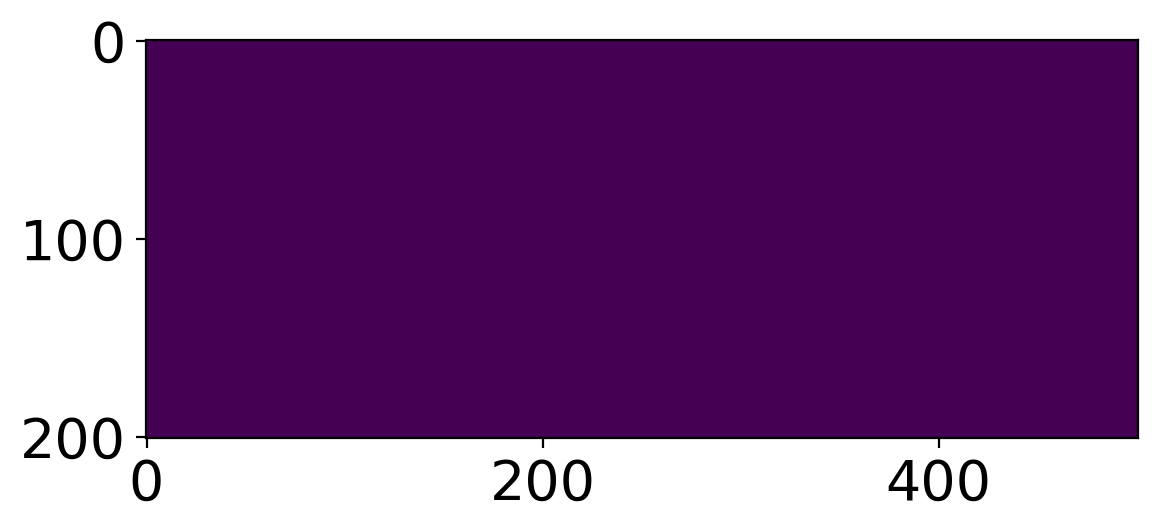

In [55]:
plt.imshow(spk_rec[0,:,indices_in].T.detach().numpy())

In [58]:
a=[1,2,3,3,3,3,4]
a.index(3)

2

$\large \text{preliminary testing}$

In [38]:
neuron_catalog_1.keys()

dict_keys(['receptors', 'antennal_lobe_local', 'antannal_lobe_projection', 'lat_horn_calyx_noMB', 'lat_horn_calyx_MB', 'MB', 'other'])

201
4500
0
429
0
683
0
514
0
49
0
5678
101
2167


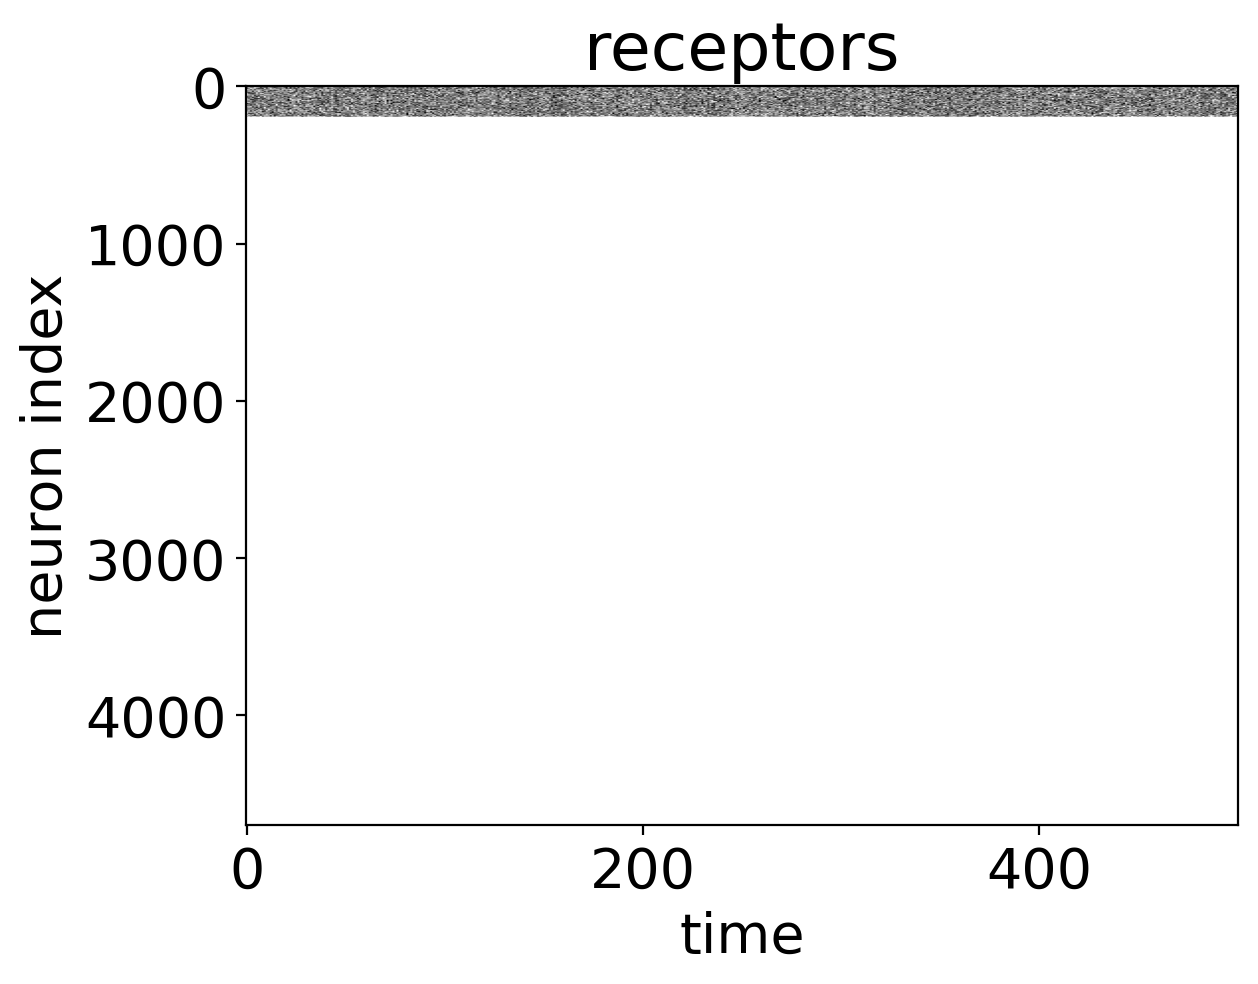

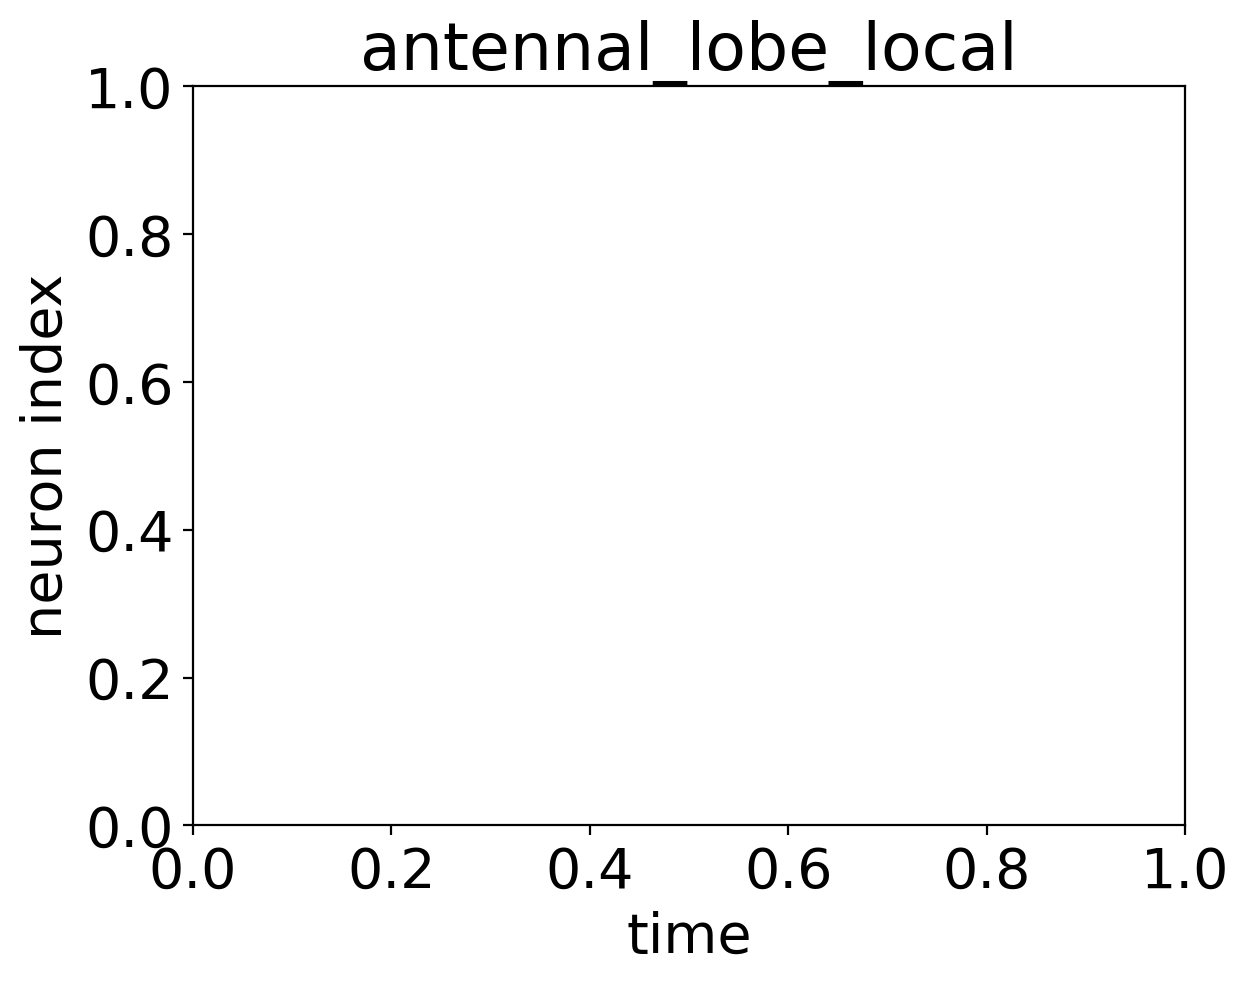

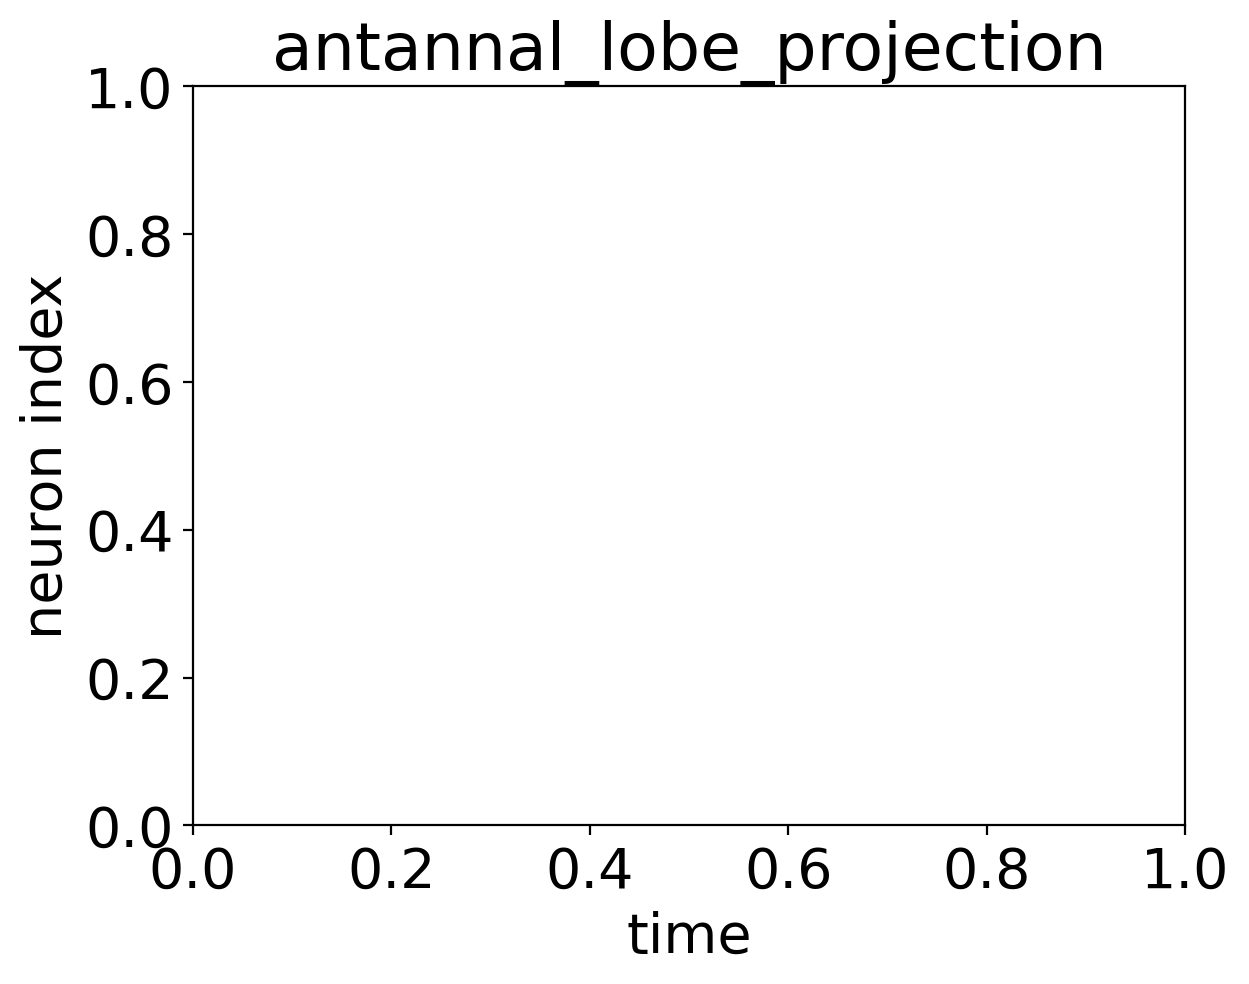

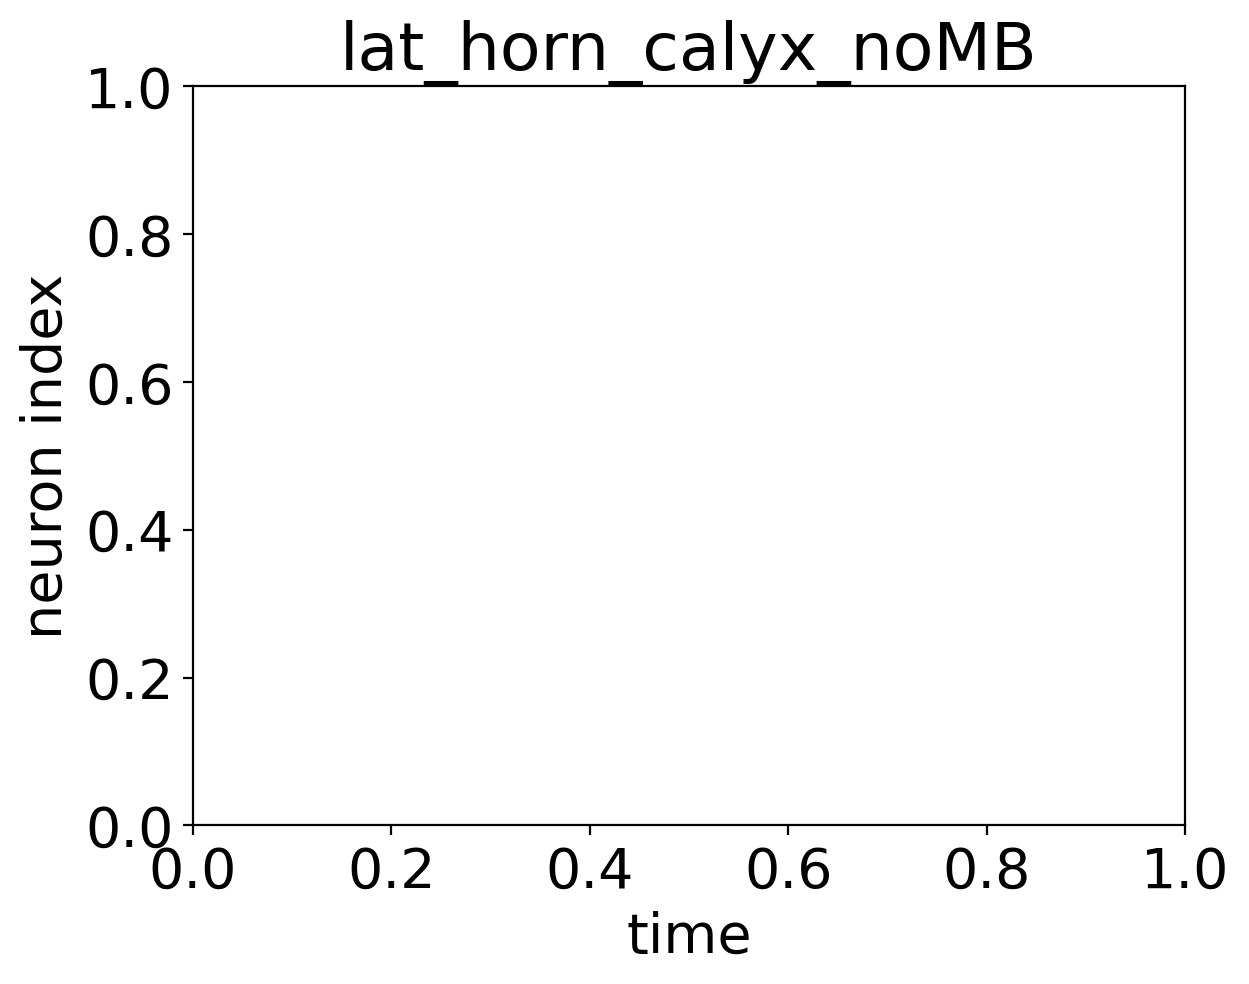

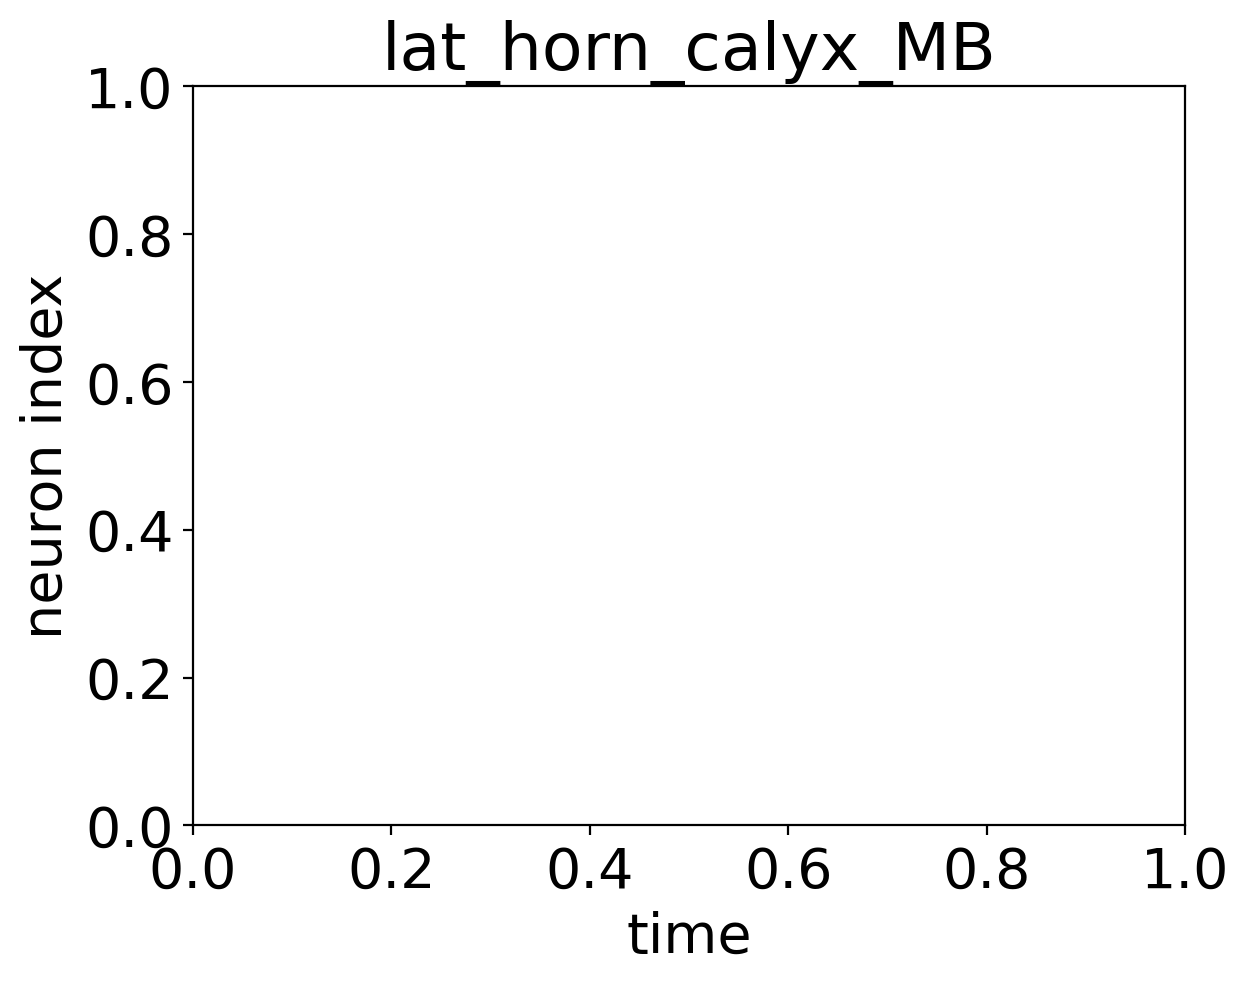

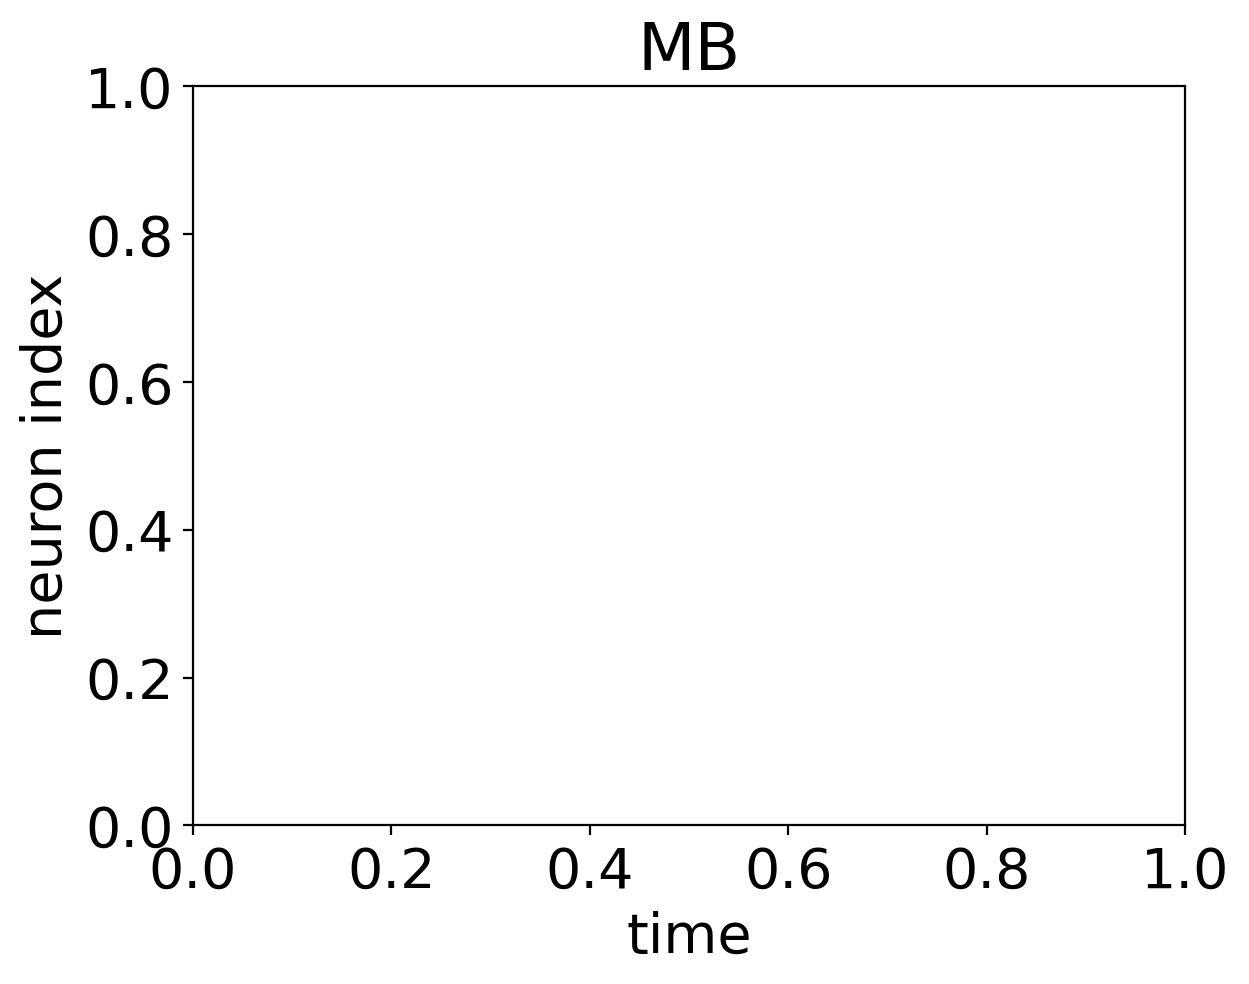

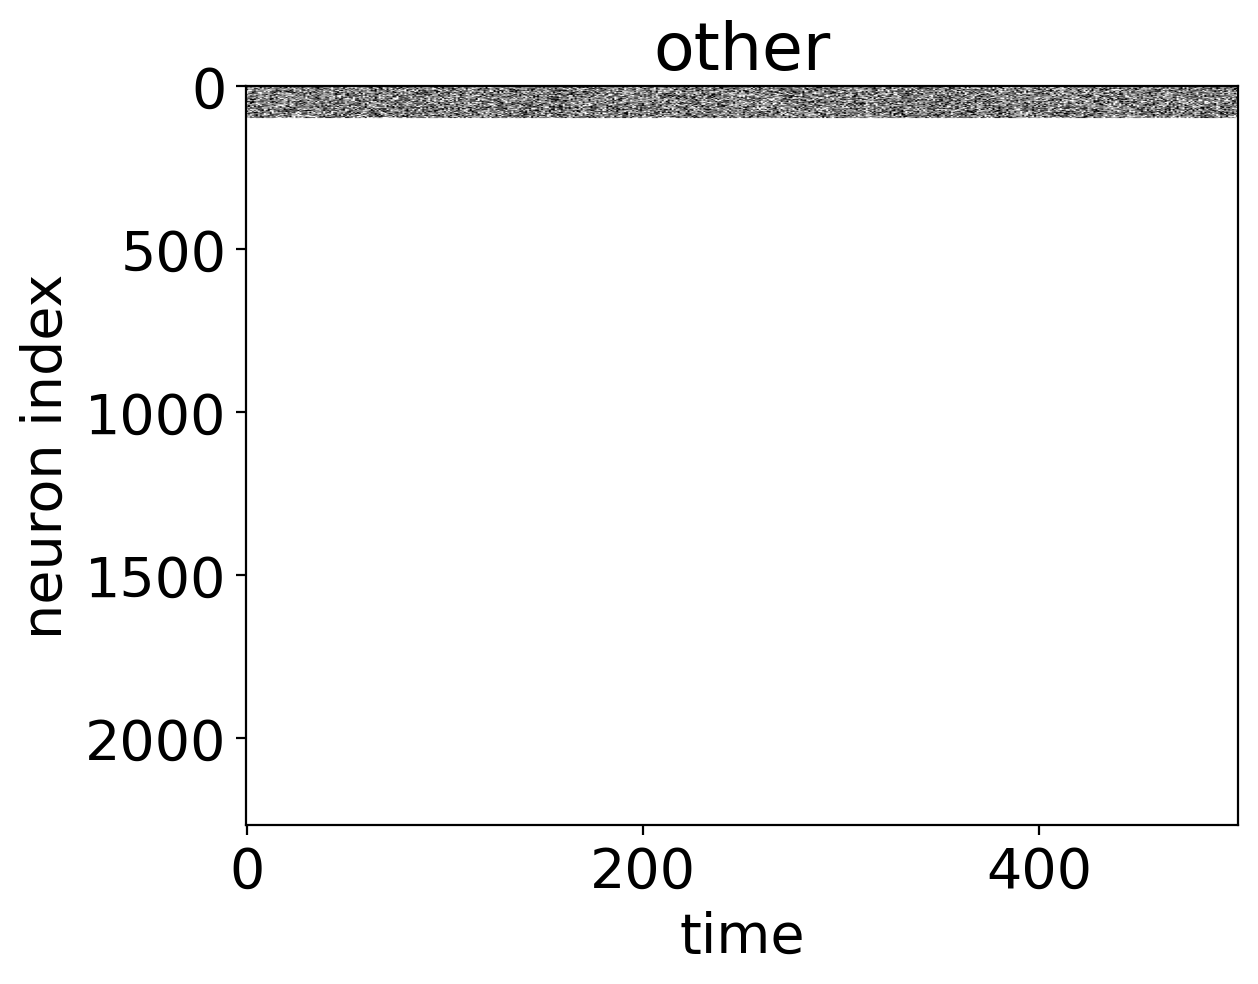

In [42]:
raster_query(celltypes=neuron_catalog_1.keys())
#raster_query(celltypes=['receptors','MB','other'])

In [ ]:
neuron_catalog_1['receptors']
hidden_ID

['720575940628660224',
 '720575940619051009',
 '720575940628553731',
 '720575940629020675',
 '720575940624384007',
 '720575940606869513',
 '720575940609228809',
 '720575940607221771',
 '720575940623302669',
 '720575940625825820',
 '720575940614037533',
 '720575940631494687',
 '720575940617166882',
 '720575940644028452',
 '720575940616921129',
 '720575940617986089',
 '720575940631429165',
 '720575940631314479',
 '720575940614996018',
 '720575940616093746',
 '720575940645576756',
 '720575940633059381',
 '720575940638818357',
 '720575940627890231',
 '720575940628619319',
 '720575940630282297',
 '720575940632633400',
 '720575940646142004',
 '720575940633509949',
 '720575940638212166',
 '720575940638867526',
 '720575940627677258',
 '720575940639080526',
 '720575940617109597',
 '720575940617232477',
 '720575940633313376',
 '720575940620574817',
 '720575940609884258',
 '720575940630257772',
 '720575940619419757',
 '720575940630462572',
 '720575940644429934',
 '720575940634706035',
 '720575940

[176, 58, 168, 174, 172, 184, 164, 166, 158, 167, 160, 177, 180, 1072, 550, 367, 531, 532, 464, 483, 511, 488, 547, 294, 500, 501, 508, 474, 517, 545, 495, 249, 530, 477, 471, 541, 520, 528, 358, 1668, 1679, 1690, 1709, 1715, 1704, 1702, 1720, 1664, 1734, 1665, 1699, 1687, 1669, 1703, 1694, 1697, 1678, 1673, 1707, 1696, 1682, 1689, 1693, 1677, 1681, 1710, 1688, 427, 406, 388, 385, 462, 389, 453, 397, 452, 411, 363, 315, 329, 307, 353, 308, 305, 297, 300, 287, 355, 378, 346, 551, 349, 333, 373, 293, 381, 331, 12, 99, 1524, 211]
[6449, 4248, 4130, 4764, 121, 4727, 9449, 5577, 7835, 8229, 7556, 1458, 73, 9396, 178, 7513, 6080, 1550, 4569, 9473, 5937, 4385, 3061, 1071, 5690, 3933, 4825, 8771, 3188, 978, 6583, 87, 1952, 8141, 3911, 1798, 4739, 1237, 5140, 831, 3589, 7182, 3015, 7852, 7519, 2535, 3153, 2583, 2832, 2469, 7174, 9423, 3017, 7737, 8430, 5836, 8766, 7981, 2358, 8351, 7698, 5229, 7014, 2129, 8235, 6931, 2206, 246, 8726, 7979, 3085, 9191, 7960, 5835, 8667, 1854, 8686, 7318, 2787, 2

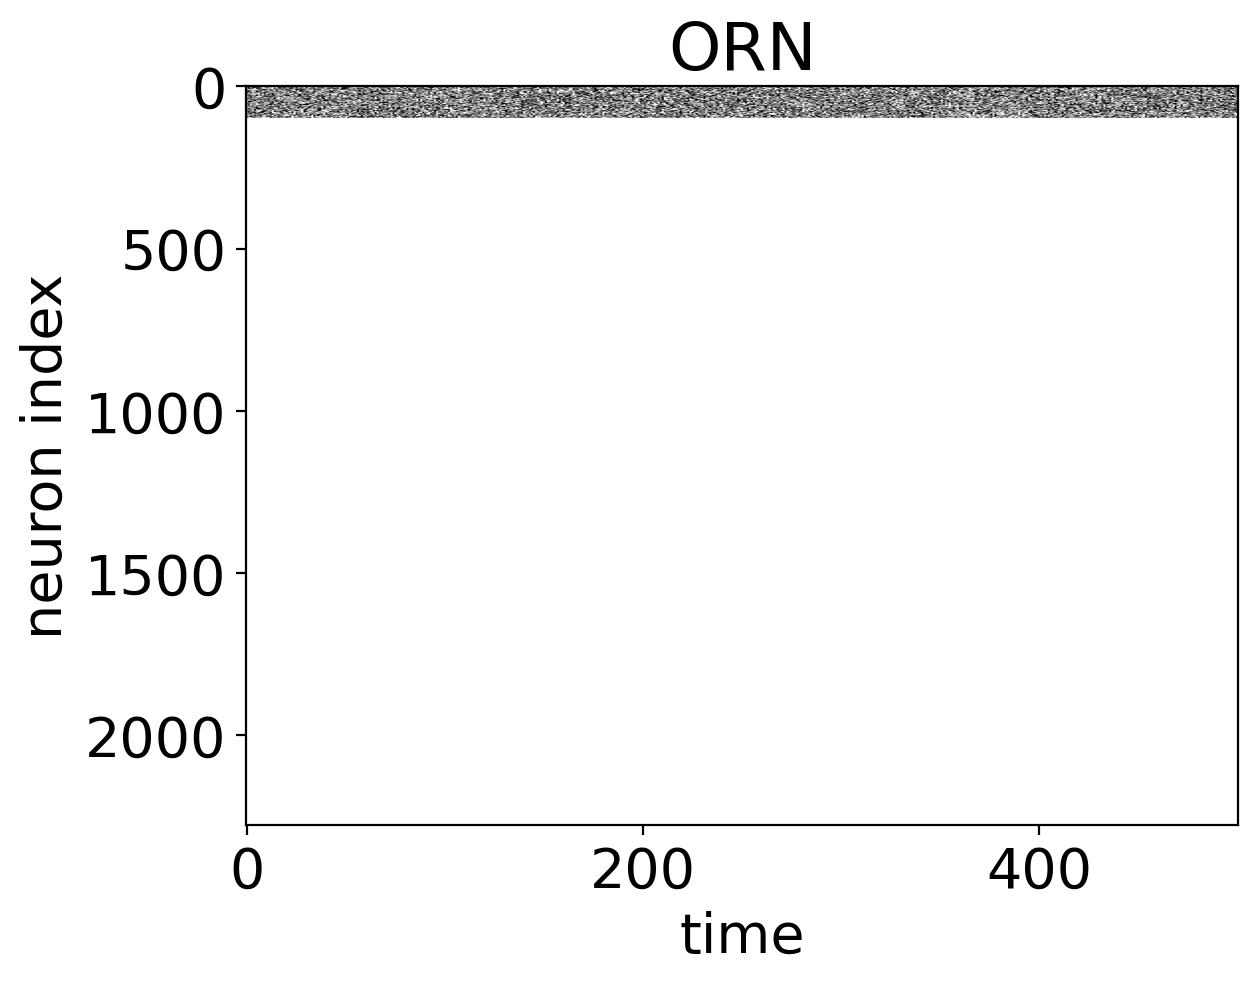

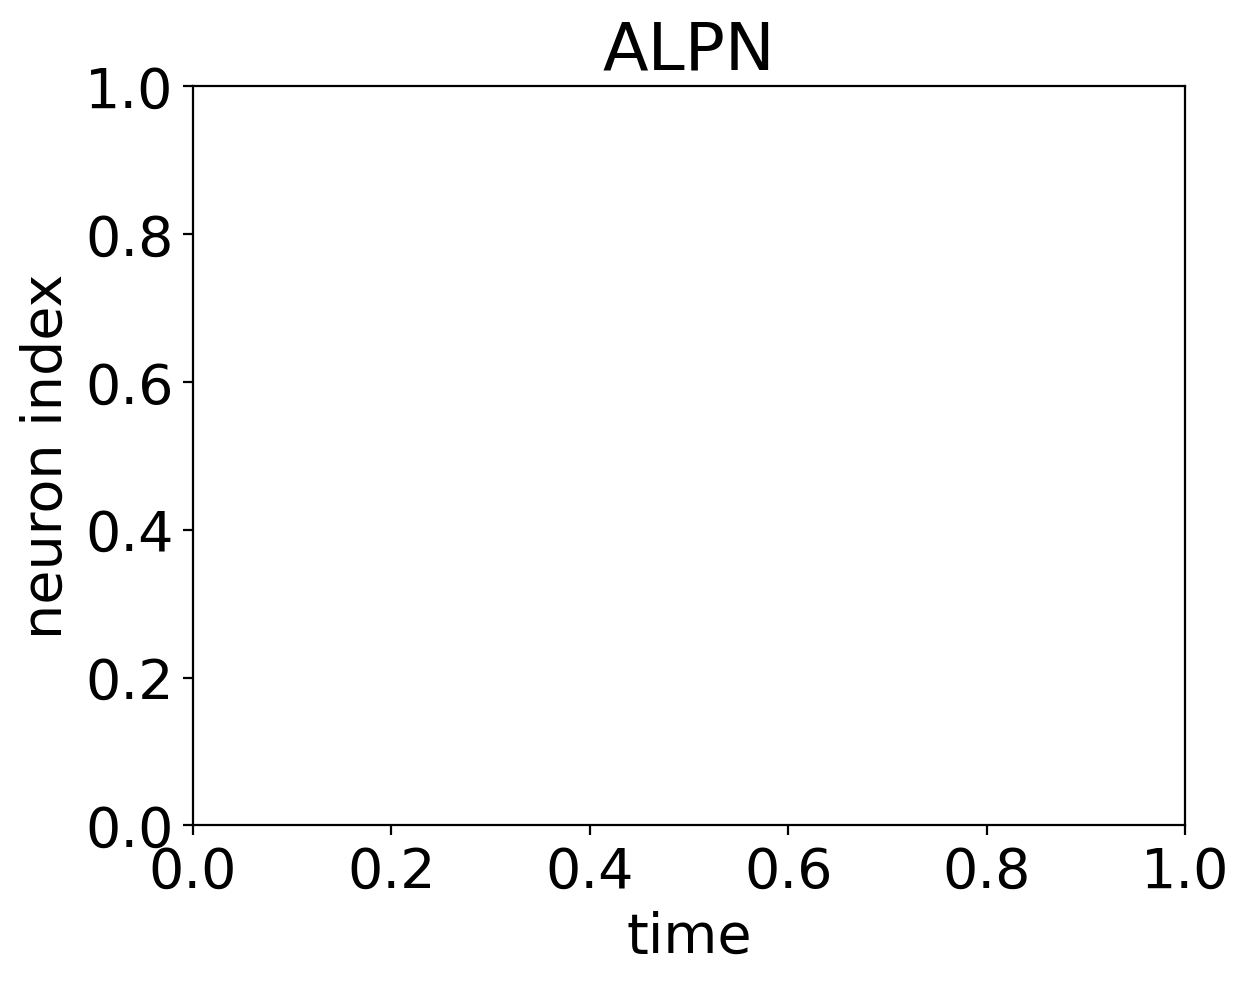

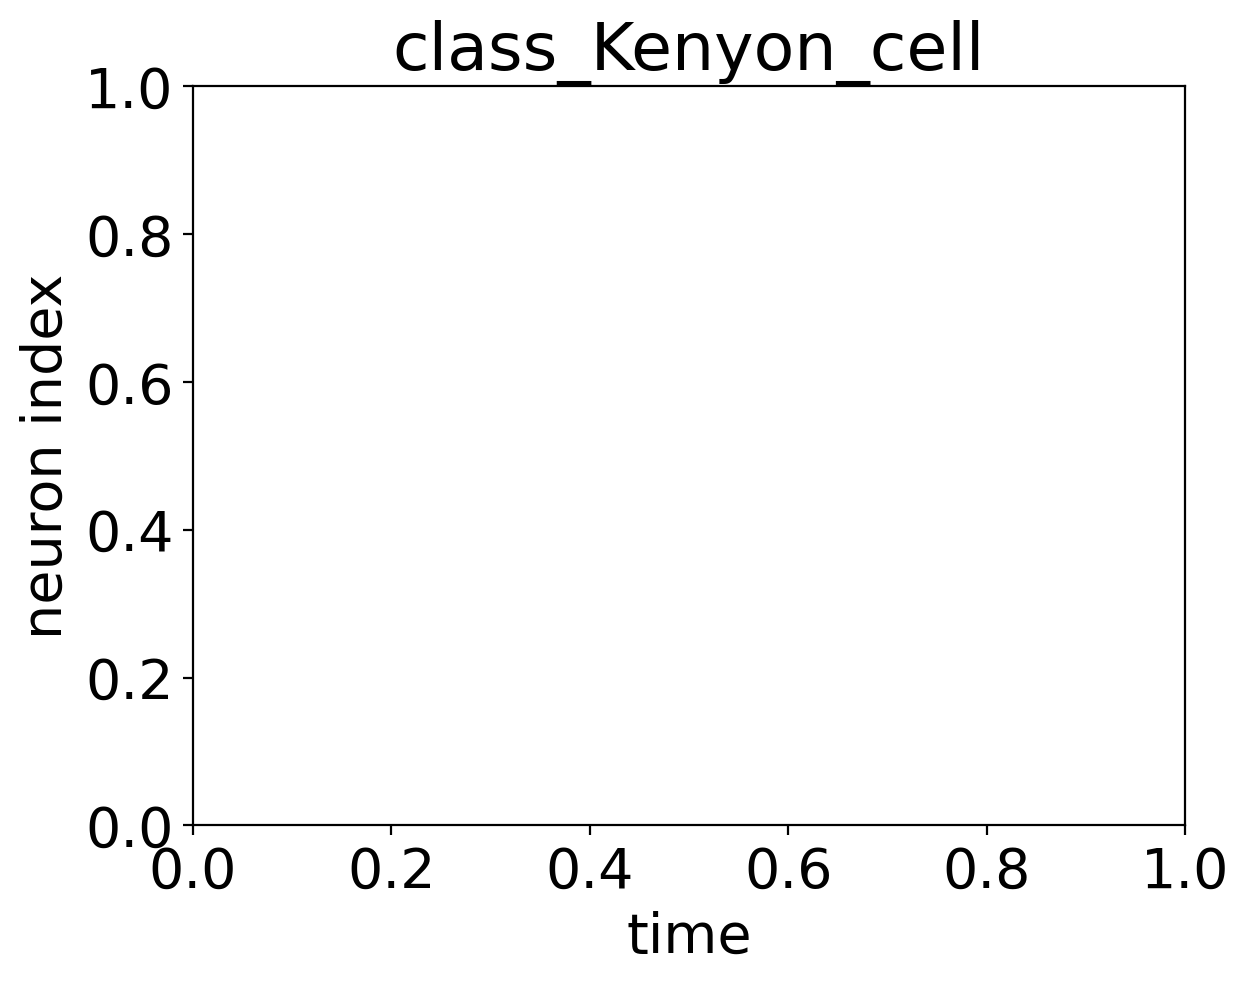

In [24]:
raster_query(maintypes=['ORN','ALPN','class_Kenyon_cell'])

In [25]:
raster_query(subtypes=['ORN_VM5d', 'KCg-s1','PPL204'])

NameError: name 'neuron_catalog' is not defined

## 3. KC NT Counting 

In [17]:
# filter connectome
# only if pre synapse and post synapse come from neurons in olfactory system (as identified above) -> use synapse
neuro_trans = conn['nt_type'].unique()


int_IDs = list(map(int, used_IDs))

#filter presynaptic
filter_pre = conn[conn['pre_root_id'].isin(int_IDs)]
#filter postsynaptic
filtered_conn = filter_pre[filter_pre['post_root_id'].isin(int_IDs)]
N_conn=len(filtered_conn)
print(f'{N_conn} connections ({np.round(N_conn/len(conn),2)} of total)')
print(f'average: {N_conn/N_neurons} connections per neuron (sparsity: {(N_conn/N_neurons**2)})')


filtered_conn.index = filtered_conn['pre_root_id']
filtered_conn = filtered_conn.drop(columns=['pre_root_id'])

filtered_conn.to_csv('filtered_conn.csv')
filtered_conn

214011 connections (0.06 of total)
average: 21.860163432073545 connections per neuron (sparsity: 0.0022329073985774815)


,post_root_id,neuropil,syn_count,nt_type
pre_root_id,,,,
720575940627737365,720575940628914436,AL_L,32,ACH
720575940619895125,720575940618561403,AL_L,31,ACH
720575940613583001,720575940623353013,MB_ML_R,9,GABA
720575940621659563,720575940609282825,AL_R,7,GABA
720575940613191591,720575940625293514,AL_L,9,GABA
...,...,...,...,...
720575940626474889,720575940623381956,MB_VL_R,1,ACH
720575940623166471,720575940623776437,MB_VL_R,1,ACH
720575940627584262,720575940624547622,SIP_L,1,ACH


In [18]:
KC_ids=[]
for sub_KC, ids in neuron_catalog['MB']['KC'].items():
    for id in ids:
        KC_ids.append(id)
print(len(KC_ids))
KC_ids=list(set(KC_ids))
KC_ids = [int(x) for x in KC_ids]
print(len(KC_ids))
KC_nt_stats = filtered_conn[filtered_conn.index.isin(KC_ids)]['nt_type']
KC_nt_summary = KC_nt_stats.value_counts()
KC_nt_summary

5177
5177


nt_type
ACH    74391
Name: count, dtype: int64

# temporary archive

In [19]:
from collections import defaultdict, Counter

# Count total ID occurrences
id_counts = Counter()

# Track in which neuron type(s) and how many times per type
id_locations = defaultdict(lambda: defaultdict(int))

for neuron_type, ids in neuron_catalog.items():
    for id in ids:
        id_counts[id] += 1
        id_locations[id][neuron_type] += 1

# Filter only repeated IDs (count > 1)
repeating_info = {
    id: {
        'count': id_counts[id],
        'locations': dict(type_counts)
    }
    for id, type_counts in id_locations.items()
    if id_counts[id] > 1
}
for id, info in list(repeating_info.items()):
    print(f"ID: {id}")
    print(f"  Total Count: {info['count']}")
    print(f"  Per-Type Count: {info['locations']}")



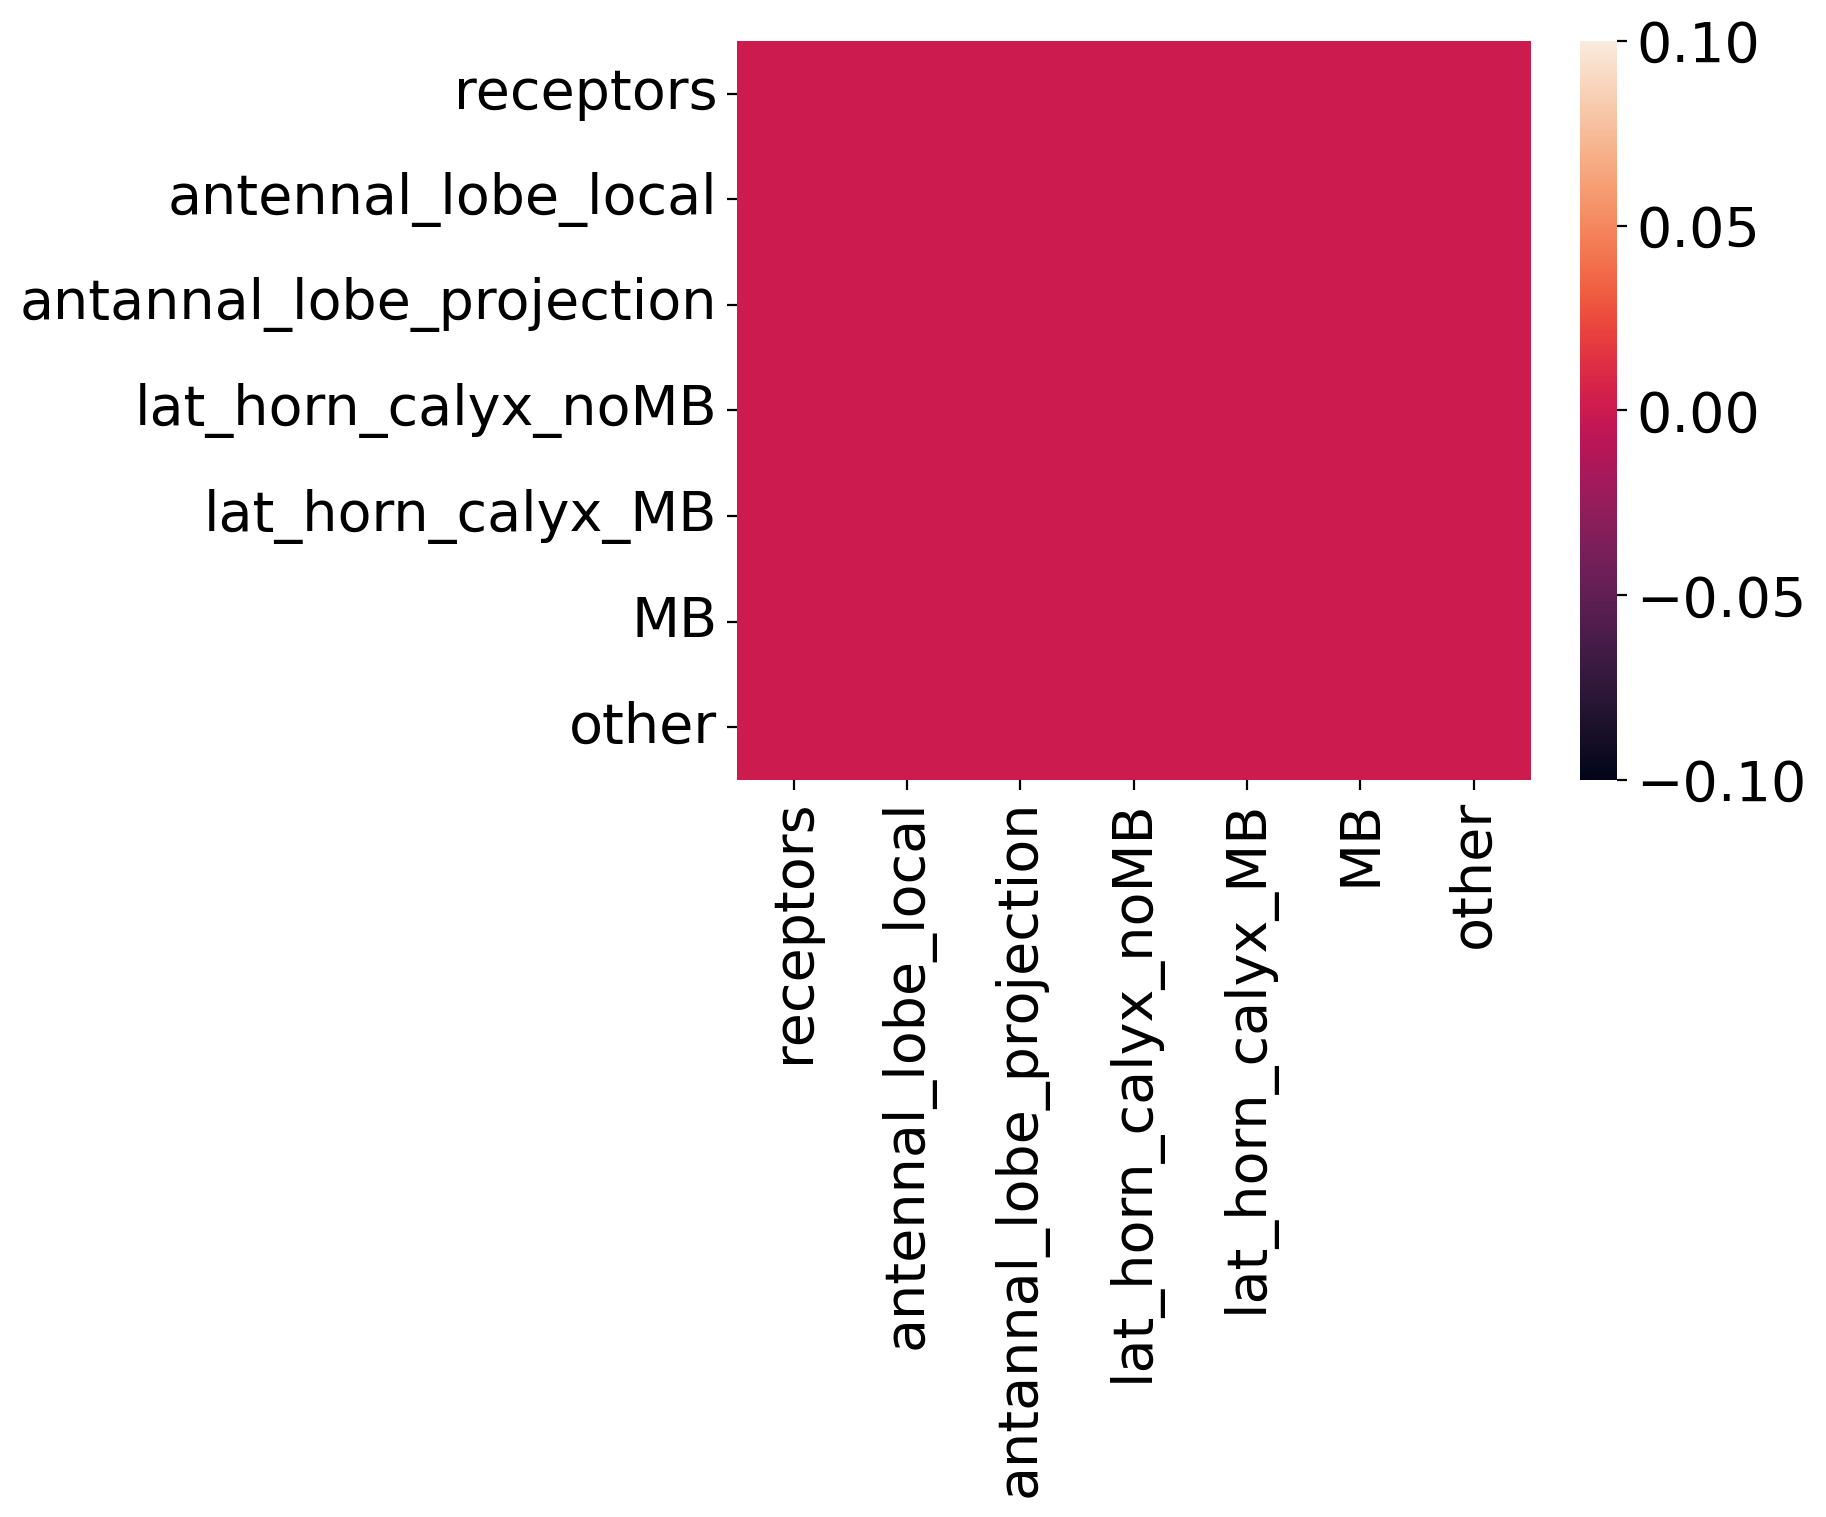

In [20]:

co_M=pd.DataFrame(0, index=neuron_catalog.keys(),columns=neuron_catalog.keys())

for row, ids_r in neuron_catalog.items():
    for col, ids_c in neuron_catalog.items():
        if row!=col:
            common_ids = [id for id in ids_r if id in ids_c]
            co_M.loc[row, col]+=len(common_ids)
sns.heatmap(co_M);

In [21]:
#make sure APL neurons are used
APL=['720575940613583001','720575940624547622']

for neuron in APL:
    for neuron2 in used_IDs:
        if neuron==neuron2:
            print(f'{neuron} included')

720575940613583001 included
720575940624547622 included


In [22]:
# filter connectome
# only if pre synapse and post synapse come from neurons in olfactory system (as identified above) -> use synapse
neuro_trans = conn['nt_type'].unique()


int_IDs = list(map(int, used_IDs))

#filter presynaptic
filter_pre = conn[conn['pre_root_id'].isin(int_IDs)]
#filter postsynaptic
filtered_conn = filter_pre[filter_pre['post_root_id'].isin(int_IDs)]
N_conn=len(filtered_conn)
print(f'{N_conn} connections ({np.round(N_conn/len(conn),2)} of total)')
print(f'average: {N_conn/N_neurons} connections per neuron (sparsity: {(N_conn/N_neurons**2)})')


filtered_conn.index = filtered_conn['pre_root_id']
filtered_conn = filtered_conn.drop(columns=['pre_root_id'])

filtered_conn.to_csv('filtered_conn.csv')
filtered_conn

214011 connections (0.06 of total)
average: 21.860163432073545 connections per neuron (sparsity: 0.0022329073985774815)


,post_root_id,neuropil,syn_count,nt_type
pre_root_id,,,,
720575940627737365,720575940628914436,AL_L,32,ACH
720575940619895125,720575940618561403,AL_L,31,ACH
720575940613583001,720575940623353013,MB_ML_R,9,GABA
720575940621659563,720575940609282825,AL_R,7,GABA
720575940613191591,720575940625293514,AL_L,9,GABA
...,...,...,...,...
720575940626474889,720575940623381956,MB_VL_R,1,ACH
720575940623166471,720575940623776437,MB_VL_R,1,ACH
720575940627584262,720575940624547622,SIP_L,1,ACH


In [23]:
def dataframe_to_matrix(df, column_names_col, values_col):
    """
    Converts a DataFrame to a matrix using one column for column names and another for values.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_names_col (str): The name of the column to use for column names.
        values_col (str): The name of the column to use for values.

    Returns:
        pd.DataFrame: The resulting matrix DataFrame.
    """

    matrix_df = df.pivot_table(
        index=df.index,
        columns=column_names_col,
        values=values_col,
        aggfunc='first', # Use 'first' to handle duplicate column names
    ).fillna(0) # Fill NaN with 0 if needed

    return matrix_df

matrix_df = dataframe_to_matrix(filtered_conn, 'post_root_id', 'syn_count')
print(matrix_df.loc[720575940627737365,  720575940628914436])
matrix_df

32.0


post_root_id,720575940602553568,720575940602564320,720575940602605536,720575940602815200,720575940602829536,720575940602977248,720575940603045804,720575940603050668,720575940603084972,720575940603111392,...,720575940660175745,720575940660217473,720575940660217729,720575940660217985,720575940660271745,720575940660912001,720575940661114753,720575940661275009,720575940661296001,720575940661337217
pre_root_id,,,,,,,,,,,,,,,,,,,,,
720575940602553568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602564320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602605536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602815200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940602829536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720575940660912001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940661114753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940661275009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
rows = matrix_df.index
cols = matrix_df.columns


set1 = set(rows)
print(len(set1))
set2 = set(cols)
set3=set(map(int, used_IDs))

set1=set1.union(set2)
print(len(set1))

not_in_list3 = list(set1.difference(set3))
not_in_list1 = list(set3.difference(set1))

print(f'{len(not_in_list1)} chosen neurons have 0 connections to other chosen neurons and are eliminated')

final_neurons = list(set1)



9490
9628
162 chosen neurons have 0 connections to other chosen neurons and are eliminated


In [25]:
matrix_df = matrix_df.reindex(columns=final_neurons, fill_value=0.0)
matrix_df = matrix_df.reindex(index=final_neurons, fill_value=0.0)

print(matrix_df.loc[720575940627737365,  720575940628914436])
matrix_df

32.0


post_root_id,720575940626251778,720575940628119555,720575940624384007,720575940624154632,720575940627202058,720575940623302669,720575940631003151,720575940625825820,720575940631494687,720575940603674656,...,720575940607180722,720575940623925180,720575940629036997,720575940605280201,720575940624711655,720575940627857384,720575940641062901,720575940650270710,720575940630052857,720575940627988474
pre_root_id,,,,,,,,,,,,,,,,,,,,,
720575940626251778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940628119555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940624384007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940624154632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940627202058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720575940627857384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940641062901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
720575940650270710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

matrix_arr=np.array(matrix_df)


# save as sparse matrix with names??? -> take original dataframe


In [27]:
# try to connect ORN from DoOR dataset to ORN from codex (cell types)
# generalizations due to missing annotations in codex:
# Gr21a.Gr63a -> Gr21a
# Ir64a.DC4 -> Ir64a & DC4 
# Ir64a.DP1m -> Ir64a & DP1m
# Or65a -> Or65
# Or22a -> Or22

# changes based on table 1 in Münch & Galizia, 2016 (and missing search results in codex):
#currently: only switched if other receptor from table is not yet in list, alternative: send to all receptors from table
# ab2B -> Or85a 
# ab4B -> Or56a
# ab5B -> drop (all receptors already otherwise mentioned?)
# ac3A -> Ir75 (a,b,c)
# ac3B -> drop
# pb2A -> drop




ORN_door_dict={0:'Or67d',1:'Or83c',2:'Or23a',3:'Or19a',4:'Or2a',5:'Or43a',6:'Or47b',7:'Or65',8:'Or88a',9:'Or42b',10:'Or92a',11:'Gr21a',12:'Or10a',13:'Or59b', 14:'Or85a',15:'Or33b',16:'Or22',17:'Or85b',18:'Or7a',19:'Or56a',20:'Or33a',21:'',22:'Or82a',24:'Or47a',25:'Or13a',26:'Or49b',27:'Or98a',28:'Or67c',29:'Or43b',30:'Or9a',31:'Or67b',32:'Or69a',33:'Or67a',34:'',35:'Or49a',36:'Or85f',37:'Ir31a',38:'Ir75d',39:'Ir92a',40:'Ir75a',41:'Ir41a',42:'Ir75',44:'Or35a',45:'Ir84a',46:'Ir76a',47:'',48:'',49:'Ir64a.DC4',50:'Ir64a.DP1m',51:'Or42a',52:'Or71a',54:'Or33c',55:'Or85e',56:'Or46a',57:'Or59c',58:'Or85d'}
ORN_door=[]
ORN_door_2_codex={}
for key, ORN in ORN_door_dict.items():
    if ORN=='Ir75':
        subclasses=['a','b','c']
        for i, sc in enumerate(subclasses):
            if i==0:
                filtered_df=community_labels[community_labels['processed_labels'].str.contains(ORN+sc, na=False)]
            else:
                filtered_df = pd.concat([filtered_df,community_labels[community_labels['processed_labels'].str.contains(ORN+sc, na=False)]])
    elif ORN=='Ir64a.DC4':
        filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DC4', na=False)]
    elif ORN=='Ir64a.DP1m':
        filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DP1m', na=False)]
    else:
        filtered_df = community_labels[community_labels['processed_labels'].str.contains(ORN, na=False)]
    ORN_door_2_codex[ORN] = list(filtered_df['root_id'])
ORN_door_2_codex.pop('', None)

/var/folders/2m/wmhx4p3j2nl2tb_z521x4qwr0000gn/T/ipykernel_35504/708194891.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DC4', na=False)]
/var/folders/2m/wmhx4p3j2nl2tb_z521x4qwr0000gn/T/ipykernel_35504/708194891.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df=community_labels[community_labels['processed_labels'].str.contains('Ir64a', na=False)][community_labels['processed_labels'].str.contains('DP1m', na=False)]


[720575940596125868,
 720575940597856265,
 720575940597944841,
 720575940598267657,
 720575940599333574,
 720575940599457990,
 720575940599459782,
 720575940599704006,
 720575940599729862,
 720575940599733446,
 720575940599736492,
 720575940599744172,
 720575940599755718,
 720575940599763910,
 720575940600010668,
 720575940600071689,
 720575940600084489,
 720575940600101641,
 720575940600124169,
 720575940600143369,
 720575940600150793,
 720575940600322965,
 720575940600433181,
 720575940600547529,
 720575940600588204,
 720575940600623020,
 720575940600646173,
 720575940600722348,
 720575940600782252,
 720575940600850441,
 720575940600866569,
 720575940600934665,
 720575940601049097,
 720575940601067436,
 720575940601103625,
 720575940601206499,
 720575940601263473,
 720575940601325484,
 720575940601412361,
 720575940601423625,
 720575940601598892,
 720575940601603185,
 720575940601653513,
 720575940601672201,
 720575940601712649,
 720575940601736201,
 720575940601867017,
 720575940602

In [28]:
ORN_door_2_codex
n=0
for key, item in ORN_door_2_codex.items():
    if len(item)<3:
        print(f'{key}, {len(item)}')
    n+=len(item)
# Or35a, 1 is okay - no other Or35 in codex anyway

Or35a, 1


In [29]:

with open('ORN_door2codex.json', "w") as f:
    json.dump(ORN_door_2_codex, f)

In [30]:
input_neurons = []
for key, value in ORN_door_2_codex.items():
    if len(value)>1:
        input_neurons.extend(value)
    else:
        input_neurons.append(value[0])


In [31]:
final_neurons

[720575940626251778,
 720575940628119555,
 720575940624384007,
 720575940624154632,
 720575940627202058,
 720575940623302669,
 720575940631003151,
 720575940625825820,
 720575940631494687,
 720575940603674656,
 720575940623237161,
 720575940624351273,
 720575940628217899,
 720575940631429165,
 720575940633886765,
 720575940614586418,
 720575940616093746,
 720575940646142004,
 720575940637524021,
 720575940627890231,
 720575940633002040,
 720575940630282297,
 720575940627103802,
 720575940614783042,
 720575940615503938,
 720575940638212166,
 720575940638867526,
 720575940629823563,
 720575940620451916,
 720575940622090316,
 720575940629495883,
 720575940618158160,
 720575940617109597,
 720575940620189790,
 720575940634771552,
 720575940622844003,
 720575940635033701,
 720575940628414567,
 720575940634706035,
 720575940608295032,
 720575940621009023,
 720575940659150977,
 720575940606853250,
 720575940659314817,
 720575940648206468,
 720575940627103877,
 720575940621926536,
 720575940625

In [32]:
final_neurons=list(set(final_neurons))
input_neurons=list(set(input_neurons))
hidden_neurons =list(set(final_neurons)-set(input_neurons))


with open("final_neurons_olf.txt", "w") as file:
    for item in final_neurons:
        file.write(str(item) + "\n")

